# ML - Random Forest


In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
import warnings


warnings.filterwarnings('ignore')

In [2]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [3]:
df = pd.read_csv("data/car.csv",names = col_names)

# EDA

In [4]:
df.describe().T.style.background_gradient(cmap='Greens')

,count,unique,top,freq
buying,1728,4,vhigh,432
maint,1728,4,vhigh,432
doors,1728,4,2,432
persons,1728,3,2,576
lug_boot,1728,3,small,576
safety,1728,3,low,576
class,1728,4,unacc,1210


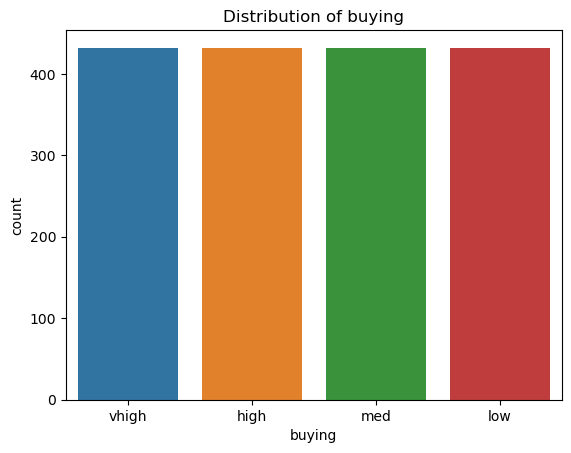

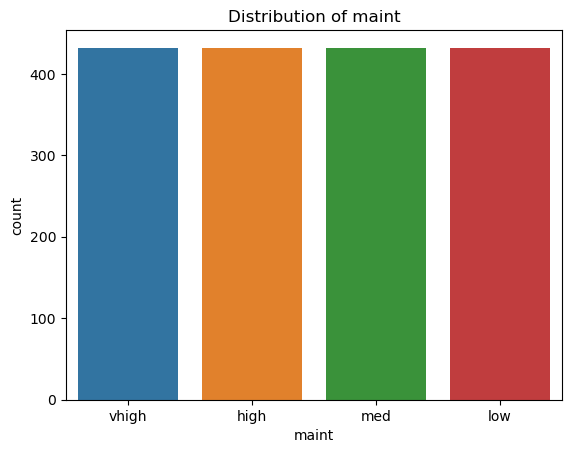

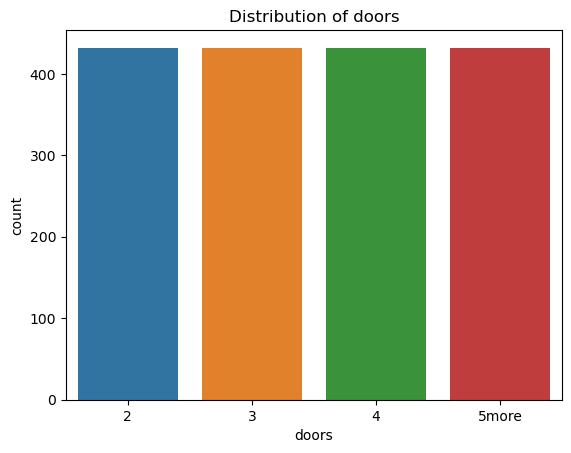

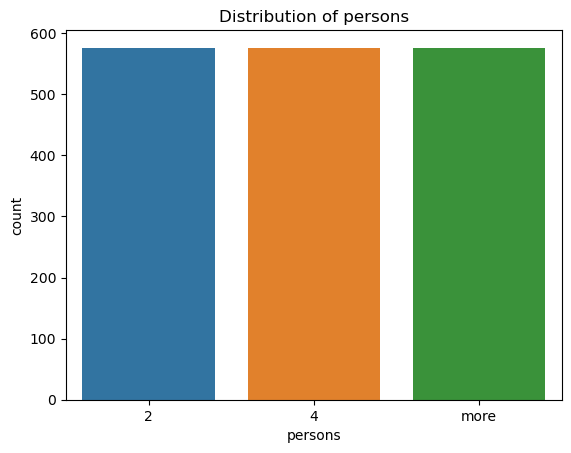

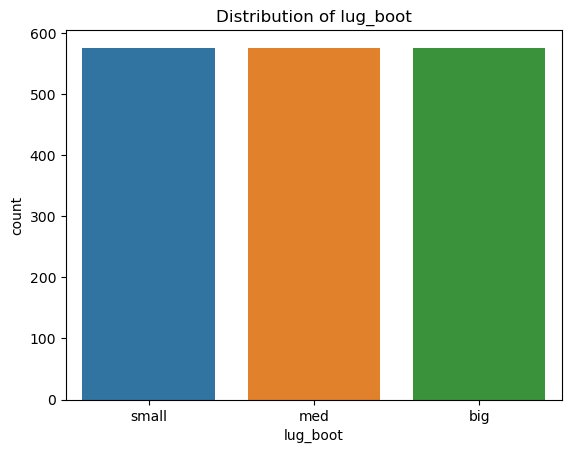

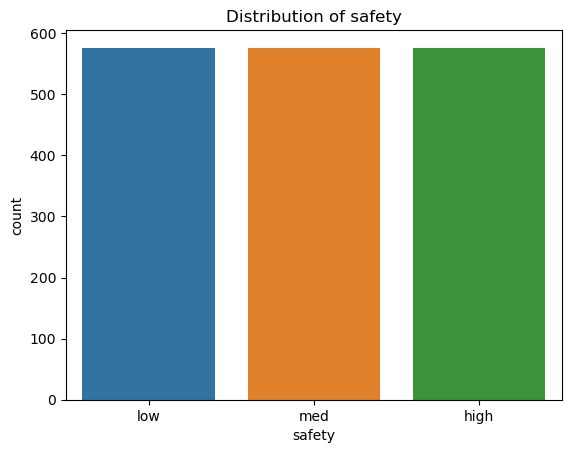

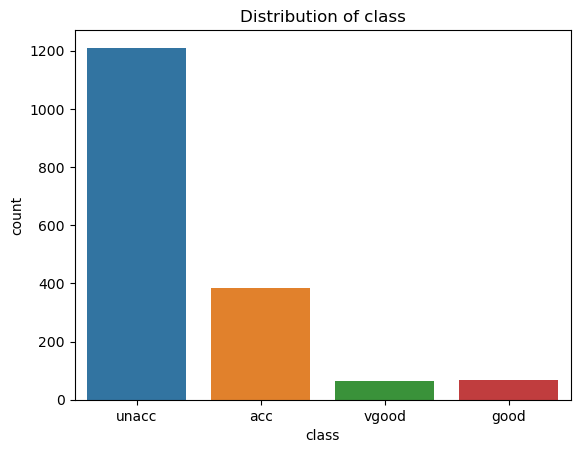

In [5]:
def plot_bar(df,i):
    #fig = plt.figure(figsize = (7, 6))
    plt.subplot(1,1,1)
    sns.countplot(df[i])
    plt.title(f"Distribution of {i}")
    plt.show()
for i in df.columns:
    plot_bar(df,i)

In [6]:
li = list(df.columns)
li

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [7]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for i in li:
    df[i] = labelencoder.fit_transform(df[i])

In [8]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [9]:
x.head()

,buying,maint,doors,persons,lug_boot,safety
0,3,3,0,0,2,1
1,3,3,0,0,2,2
2,3,3,0,0,2,0
3,3,3,0,0,1,1
4,3,3,0,0,1,2


In [10]:
y.head()

0    2
1    2
2    2
3    2
4    2
Name: class, dtype: int32

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30 ,random_state =1)

# Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
y_pred2 = rf.predict(x_test)

In [13]:
print(f"Random Forest accuracy is : {round(accuracy_score(y_test,y_pred2)*100,2)} %")

Random Forest accuracy is : 96.34 %


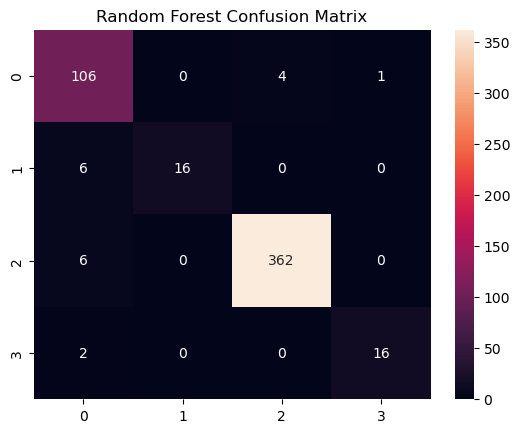

In [14]:
plt.title('Random Forest Confusion Matrix')
sns.heatmap(confusion_matrix(y_test,y_pred2),annot=True,fmt='g')
plt.show()

In [15]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92       111
           1       1.00      0.73      0.84        22
           2       0.99      0.98      0.99       368
           3       0.94      0.89      0.91        18

    accuracy                           0.96       519
   macro avg       0.95      0.89      0.92       519
weighted avg       0.97      0.96      0.96       519

